# **Random Forest Model**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump

In [68]:
X_train = pd.read_csv('../data/processed/train_test_madrid/Xtrain.csv')
X_test = pd.read_csv('../data/processed/train_test_madrid/Xtest.csv')

y_train = pd.read_csv('../data/processed/train_test_madrid/ytrain.csv')
y_test = pd.read_csv('../data/processed/train_test_madrid/ytest.csv')

In [69]:
import numpy as np

# Antes de ajustar el modelo, convierte y en un array unidimensional
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


In [70]:
X_test

,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
0,15.666667,4,5,0,1
1,17.750000,4,2,0,1
2,19.333333,4,5,0,1
3,23.666667,4,5,0,0
4,22.916667,4,2,0,0
...,...,...,...,...,...
10782,0.154167,4,0,2,1
10783,33.583333,4,2,0,0
10784,33.041667,12,4,2,1
10785,1.333333,9,2,1,1


In [71]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state= 23)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=23)

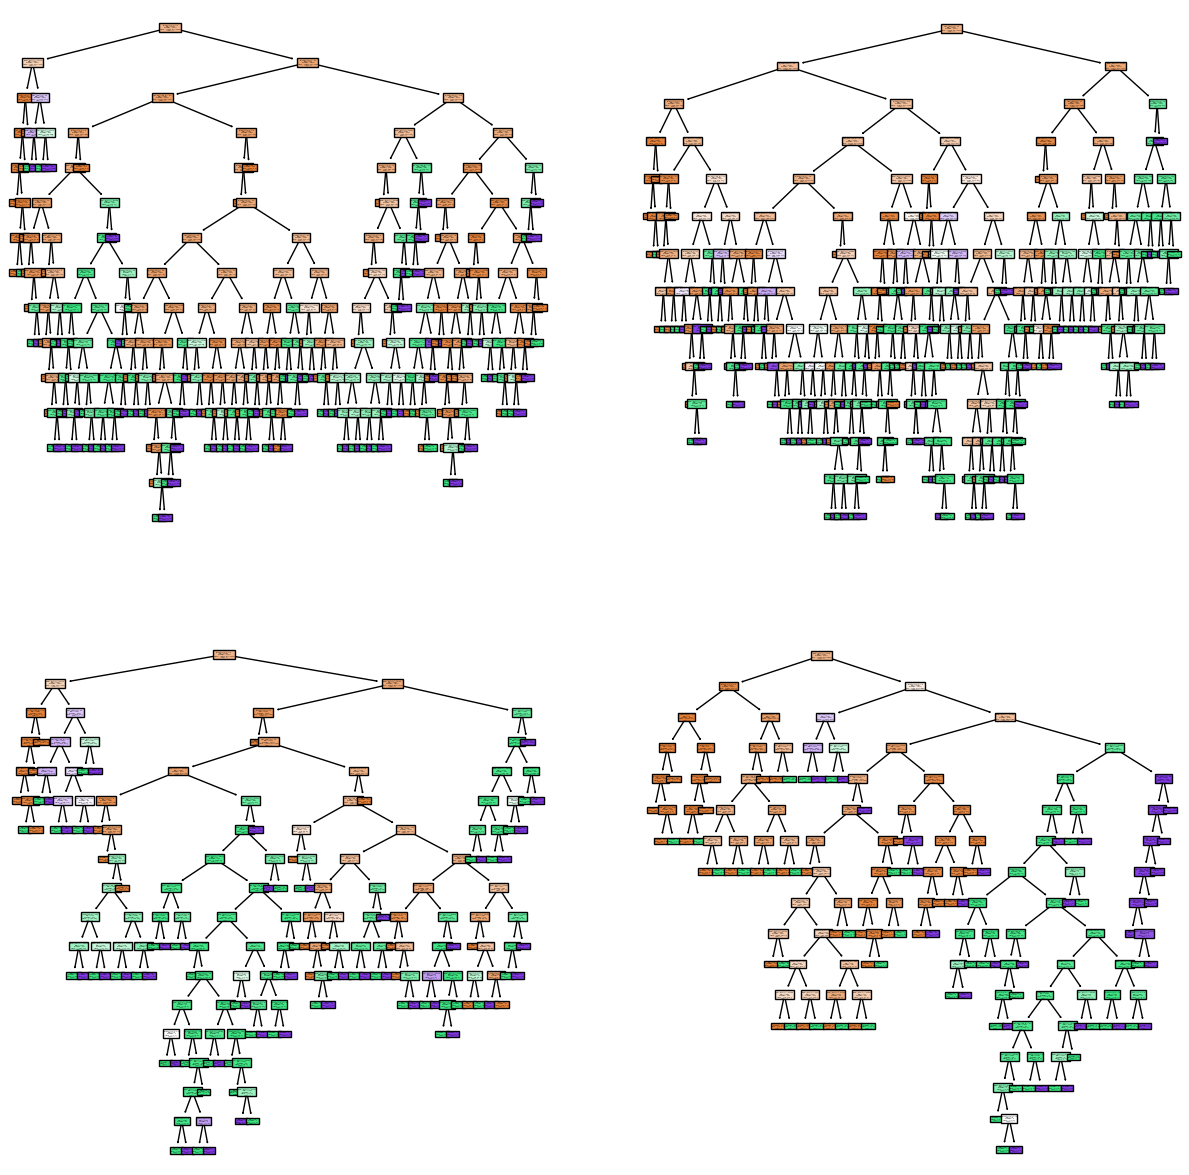

In [73]:
from sklearn import tree

fig, axis = plt.subplots (2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)

plt.show()

In [74]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [76]:
dump(model, open("../models/RandomForestMadrid_23.pk", "wb"))

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7263    0    0]
 [   0 2065    0]
 [   0    0 1459]]


Hay un falso positivo o negativo, en el resto de valores fuera de la diagonal principal son ceros.

In [79]:
# Informe de clasificación
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7263
           1       1.00      1.00      1.00      2065
           2       1.00      1.00      1.00      1459

    accuracy                           1.00     10787
   macro avg       1.00      1.00      1.00     10787
weighted avg       1.00      1.00      1.00     10787



In [80]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

madrid_df = pd.read_csv('../data/processed/factorize_csv/sin_LL.csv')
X = madrid_df.drop('PELIGROSIDAD_N', axis =1)
y = madrid_df['PELIGROSIDAD_N']


model = RandomForestClassifier(n_estimators=100) 
kf = KFold(n_splits=5, shuffle=True, random_state=23) 
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')


In [81]:
print("Precisión promedio:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())


Precisión promedio: 0.9998702021138512
Desviación estándar de la precisión: 0.00016165024823069406


Una precisión promedio 99.99% junto con una desviación estándar extremadamente baja indica que el modelo tiene un rendimiento excelente en la validación cruzada. La precisión promedio cercana a 1.00 sugiere que el modelo es capaz de hacer predicciones casi perfectas en los conjuntos de prueba de cada pliegue de la validación cruzada.

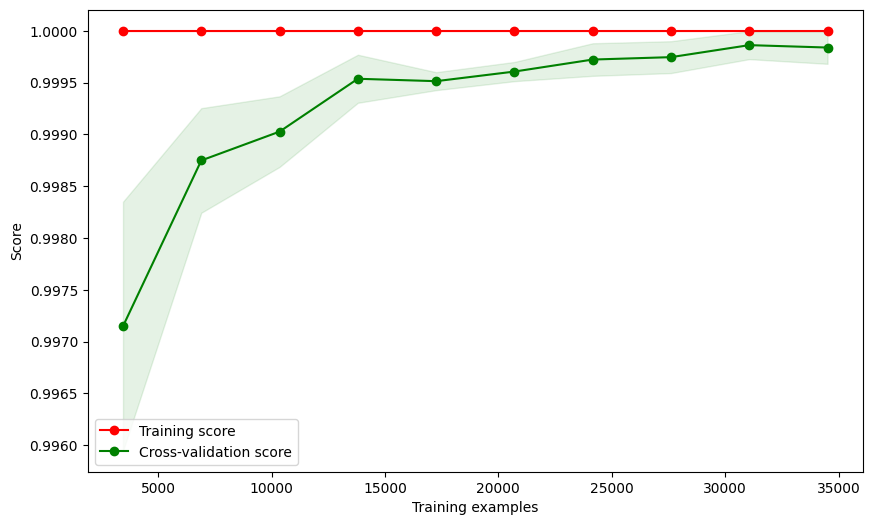

In [82]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


La línea roja lineal desde 1.00 en una curva de aprendizaje indica que el modelo está sobreajustado a los datos de entrenamiento. Esto significa que el modelo se adapta perfectamente a los datos de entrenamiento, alcanzando una precisión del 100%, pero no generaliza bien a nuevos datos.